In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [361]:
def show(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.show()
    
def export(imagename):
    cv2.imwrite(imagename+".jpg", eval(imagename))
    
kernel = np.ones((7,7),np.uint8)
kernel_bigger = np.ones((50,50),np.uint8)
kernel_even_bigger = np.ones((5,1000),np.uint8)

padding_size = 10

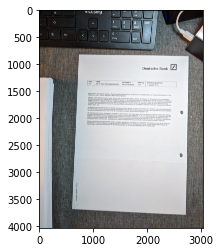

In [134]:
img00 = cv2.imread("img00.jpg")
show(img00)

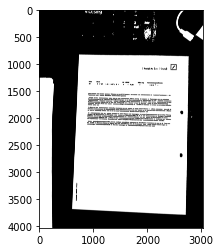

In [247]:
img01 = cv2.cvtColor(img00, cv2.COLOR_BGR2GRAY)
ret,img01 = cv2.threshold(img01, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
img01 = cv2.morphologyEx(img01, cv2.MORPH_OPEN, kernel)
img01 = cv2.morphologyEx(img01, cv2.MORPH_CLOSE, kernel)
show(img01)

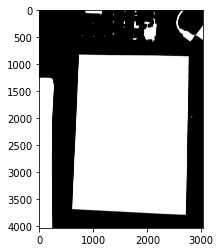

In [339]:
img02 = cv2.morphologyEx(img01, cv2.MORPH_CLOSE, kernel_bigger)
show(img02)

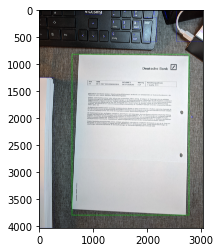

In [363]:
img03 = img00.copy()
bounding_boxes = list()

contours = cv2.findContours(img02, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours[0]:
    x,y,w,h = cv2.boundingRect(c)
    bounding_boxes.append(np.array([x, y, x+w, y+h, w*h]))
    cv2.rectangle(img03, (x, y), (x + w, y + h), (0,0,255), 2)
    
bb_index = np.argmax(np.array(bounding_boxes)[:,4])
bb = bounding_boxes[bb_index]

cv2.rectangle(img03, (bb[0], bb[1]), (bb[2], bb[3]), (0,255,0), 2)

bbwp = bb[:4].copy()
bbwp[0] = bbwp[0] - padding_size
bbwp[1] = bbwp[1] - padding_size
bbwp[2] = bbwp[2] + padding_size
bbwp[3] = bbwp[3] + padding_size

cv2.rectangle(img03, (bbwp[0], bbwp[1]), (bbwp[2], bbwp[3]), (0,255,0), 2)
    
show(img03)

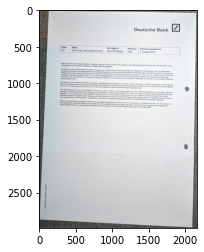

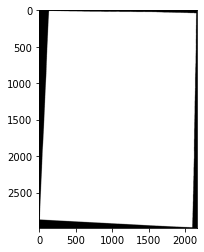

In [376]:
img04 = img00[bbwp[1]:bbwp[3], bbwp[0]:bbwp[2]]
img05 = img02[bbwp[1]:bbwp[3], bbwp[0]:bbwp[2]]
img05 = cv2.morphologyEx(img05, cv2.MORPH_CLOSE, kernel)
show(img04)
show(img05)

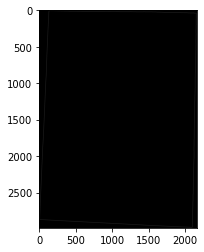

In [366]:
img06 = cv2.Canny(img05, 127, 255)
show(img06)

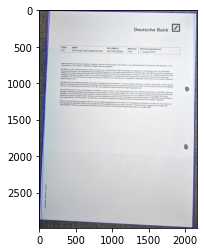

In [368]:
img07 = img04.copy()

for line in cv2.HoughLines(img06,1,np.pi/180,200):
    rho, theta = line[0]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    n = 5000
    x1 = int(x0 + n * (-b))
    y1 = int(y0 + n * (a))
    x2 = int(x0 - n * (-b))
    y2 = int(y0 - n * (a))

    cv2.line(
        img07, 
        (x1, y1), 
        (x2, y2), 
        (0, 0, 255), 
        2
    )

show(img07)

In [377]:
# export("img00")  # because why would I?
export("img01")
export("img02")
export("img03")
export("img04")
export("img05")
export("img06")
export("img07")